## Libs

In [1]:
install.packages("VIM")
library(VIM)
library(vegan)
library(dplyr)


## EDA

In [2]:
fauna <- read.csv("fauna.csv")

# ensuring the same order of sites in fauna dataframe
fauna <- fauna[order(fauna$SITE), ]
head(fauna)


,SITE,Hydrozoa..Hydrozoa,Turbellaria..Turbellaria,Nematoda,Gordiidae,Tardigrada,Bivalvia..Sphaeriidae,Gastropoda..Hydrobiidae,Gastropoda..Planorbidae,Gastropoda..Physidae,...,Leptoceridae...Notoperata.sparsa,Philopotamidae...Hydrobiosella.waddama,Philorheithridae...Aphilorheithrus.sp.AV3,Philorheithridae...Austrheithrus.sp.,Philorheithridae...Tasmanthrus.angustipennis,Philorheithridae...Tasmanthrus.sp.,Philorheithridae...unid.tiny.philoreithrids,Polycentropodidae...Genus.I.sp..AV3,Polycentropodidae...Plectrocnemia.sp.AV1,Tasimiidae...Tasimia.sp.AV1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Ansons river,0,0,5,0,0,43,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,Black river,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,Blackwell river,0,2,0,0,0,3,97,0,0,...,0,1,0,0,0,36,0,0,0,1
4,Boobyalla river,0,1,1,0,0,36,5,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Dans rivulet,0,0,1,0,0,0,1,0,0,...,0,0,4,0,1,0,0,0,0,0
6,Deep creek,0,0,0,0,0,177,72,0,0,...,0,0,0,1,0,28,0,0,0,0


In [3]:
dim(fauna)


[1]  27 200

In [4]:
sum(is.na(fauna))


[1] 0

In [5]:
env <- read.delim("env.tsv")

# ensuring the same order of sites in env dataframe
env <- env[order(env$SITE), ]
head(env)


,SITE,Abstraction,Regulation,Grazing...proportion.of.total.catchment.area.,fines..proportion.substrata.,Temperature..oC.,Conductivity..uS.cm.,average.turbidity..NTU.,pH,Alkalinity.Total..mg.CaCO3.L.,Nitrate.Nitrite..mg.N.L.,DRP..mg.P.L.,N.total..mg.N.L.,P.Total..mg.P.L.,Average...shading,Average.algae.cover....,Chl.a..mg.m2.,GrazingRank
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Ansons river,0.00000,0.00000,0.000000000,0.20,18.0,125.0,3.05,7.0,8,0.006,0.004,0.34,0.017,80.50,4.000000,8.7104,Low
2,Black river,0.00047,0.00414,0.046624793,0.00,11.2,99.0,2.50,5.1,2,0.004,0.004,0.58,0.015,81.75,8.266667,34.8416,Low
3,Blackwell river,0.00248,0.00248,0.017061051,0.10,13.7,96.1,NA,7.4,24,0.030,0.004,0.13,0.013,90.00,0.267000,3.8100,Low
4,Boobyalla river,0.01440,0.01911,0.260394952,0.05,17.7,173.0,5.58,6.8,18,0.076,0.041,0.67,0.216,79.50,44.066667,26.1312,Medium
5,Dans rivulet,0.00024,0.00024,0.005096963,0.00,13.0,48.0,0.76,9.1,8,0.089,0.002,0.15,0.009,51.50,0.600000,3.5386,Low
6,Deep creek,0.00994,0.00994,0.592333607,0.10,18.9,164.0,0.16,7.1,40,0.233,0.006,0.63,0.032,54.25,3.533333,7.3494,Severe


In [6]:
dim(env)


[1] 27 18

In [7]:
sum(is.na(env))


[1] 15

In [8]:
# substituting nearest neighbours' values instead of nans
env <- kNN(env, k = 3)
env <- subset(env, select = -grep("_imp$", names(env)))
sum(is.na(env))


[1] 0

In [9]:
# Checling that the types of env are OK.
names_and_types <- sapply(env, function(x) paste(class(x), collapse = ","))

names_and_types_df <- data.frame(
    Name = names(env),
    Type = names_and_types
)
names_and_types_df


,Name,Type
,<chr>,<chr>
SITE,SITE,character
Abstraction,Abstraction,numeric
Regulation,Regulation,numeric
Grazing...proportion.of.total.catchment.area.,Grazing...proportion.of.total.catchment.area.,numeric
fines..proportion.substrata.,fines..proportion.substrata.,numeric
Temperature..oC.,Temperature..oC.,numeric
Conductivity..uS.cm.,Conductivity..uS.cm.,numeric
average.turbidity..NTU.,average.turbidity..NTU.,numeric
pH,pH,numeric


In [10]:
spatial <- read.delim("coord.tsv")
spatial <- spatial %>% select(SITE, lon, lat)

# ensuring the same order of sites in spatial dataframe
spatial <- spatial[order(spatial$SITE), ]
head(spatial)


,SITE,lon,lat
,<chr>,<dbl>,<dbl>
1,Ansons river,148.1443,-41.17994
2,Black river,145.4000,-40.99786
3,Blackwell river,145.5412,-41.21813
4,Boobyalla river,147.8138,-40.97754
5,Dans rivulet,147.8701,-41.42824
6,Deep creek,145.2135,-40.89625


In [11]:
# ensuring the same order of sites in fauna, spatial and env dataframes
stopifnot(all(fauna$SITE == env$SITE))
stopifnot(all(spatial$SITE == env$SITE))


## CCA

In [12]:
# leaving only numerical values for cca
env_num <- env %>% select(where(is.numeric))
fauna_num <- fauna %>% select(where(is.numeric))


In [13]:
# standardizing
env_num <- env_num %>% decostand("range")
fauna_num <- decostand(fauna_num, "log")


In [14]:
# To obtain string for model formula from names of numerical external factors
paste(names(env_num), collapse = " + ")


[1] "Abstraction + Regulation + Grazing...proportion.of.total.catchment.area. + fines..proportion.substrata. + Temperature..oC. + Conductivity..uS.cm. + average.turbidity..NTU. + pH + Alkalinity.Total..mg.CaCO3.L. + Nitrate.Nitrite..mg.N.L. + DRP..mg.P.L. + N.total..mg.N.L. + P.Total..mg.P.L. + Average...shading + Average.algae.cover.... + Chl.a..mg.m2."

In [15]:
graze_cca <- cca(
    fauna_num ~ Abstraction + Grazing...proportion.of.total.catchment.area. + fines..proportion.substrata. + Temperature..oC.
        + Conductivity..uS.cm. + average.turbidity..NTU. + pH + Nitrate.Nitrite..mg.N.L. + P.Total..mg.P.L. + Average...shading + Chl.a..mg.m2.,
    data = env_num
)


In [16]:
# model selection to choose better ordinal logistic regression model
finalmodel <- ordistep(graze_cca, scope = formula(graze_cca))



Start: fauna_num ~ Abstraction + Grazing...proportion.of.total.catchment.area. +      fines..proportion.substrata. + Temperature..oC. + Conductivity..uS.cm. +      average.turbidity..NTU. + pH + Nitrate.Nitrite..mg.N.L. +      P.Total..mg.P.L. + Average...shading + Chl.a..mg.m2. 



In [17]:
summary(finalmodel)



Call:
cca(formula = fauna_num ~ Abstraction + Grazing...proportion.of.total.catchment.area. +      fines..proportion.substrata. + Temperature..oC. + Conductivity..uS.cm. +      average.turbidity..NTU. + pH + Nitrate.Nitrite..mg.N.L. +      P.Total..mg.P.L. + Average...shading + Chl.a..mg.m2., data = env_num) 

Partitioning of scaled Chi-square:
              Inertia Proportion
Total           2.571     1.0000
Constrained     1.230     0.4783
Unconstrained   1.341     0.5217

Eigenvalues, and their contribution to the scaled Chi-square 

Importance of components:
                        CCA1   CCA2    CCA3    CCA4    CCA5    CCA6    CCA7
Eigenvalue            0.2876 0.1594 0.13631 0.11172 0.10069 0.08999 0.08442
Proportion Explained  0.1119 0.0620 0.05303 0.04346 0.03917 0.03501 0.03284
Cumulative Proportion 0.1119 0.1739 0.22692 0.27038 0.30955 0.34455 0.37739
                         CCA8    CCA9   CCA10   CCA11     CA1     CA2     CA3
Eigenvalue            0.07467 0.06787 0.06420 0.

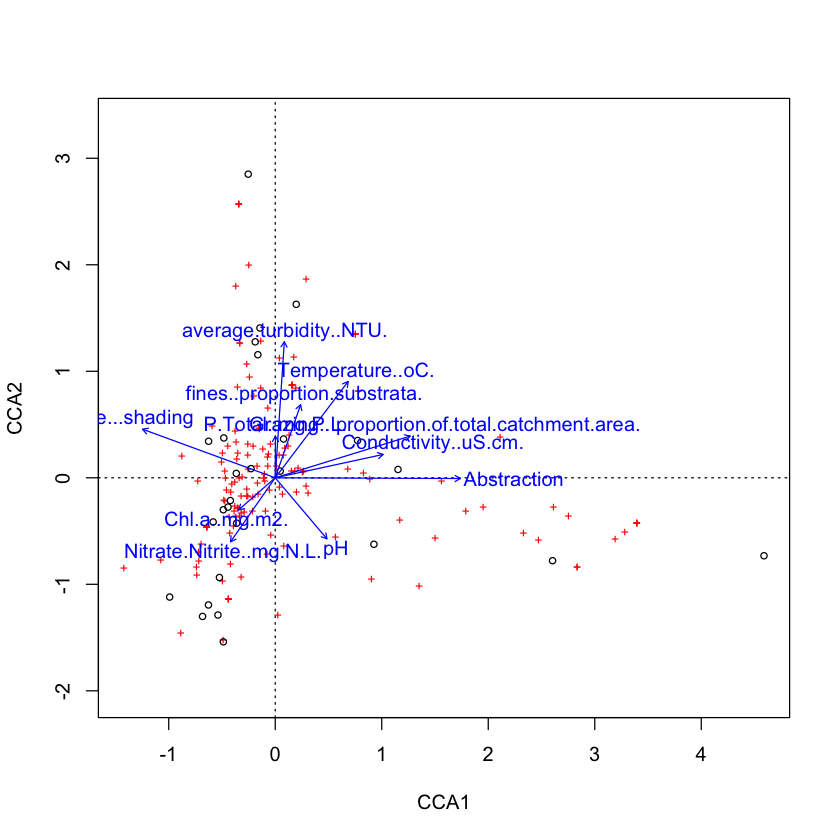

In [18]:
plot(finalmodel)


In [19]:
print(vif.cca(finalmodel))


                                  Abstraction 
                                     3.536757 
Grazing...proportion.of.total.catchment.area. 
                                     6.799625 
                 fines..proportion.substrata. 
                                     3.774949 
                             Temperature..oC. 
                                     3.377887 
                         Conductivity..uS.cm. 
                                     1.700251 
                      average.turbidity..NTU. 
                                     2.220910 
                                           pH 
                                     1.553223 
                     Nitrate.Nitrite..mg.N.L. 
                                     1.512478 
                             P.Total..mg.P.L. 
                                     2.329517 
                            Average...shading 
                                     3.756599 
                                Chl.a..mg.m2. 
             

Variance Inflation Factors look OK (all VIFs < 10)

In [20]:
# Testing the significance of the obtained CCA model
print(anova.cca(finalmodel))


Permutation test for cca under reduced model
Permutation: free
Number of permutations: 999

Model: cca(formula = fauna_num ~ Abstraction + Grazing...proportion.of.total.catchment.area. + fines..proportion.substrata. + Temperature..oC. + Conductivity..uS.cm. + average.turbidity..NTU. + pH + Nitrate.Nitrite..mg.N.L. + P.Total..mg.P.L. + Average...shading + Chl.a..mg.m2., data = env_num)
         Df ChiSquare      F Pr(>F)   
Model    11    1.2295 1.2501  0.009 **
Residual 15    1.3411                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [21]:
# Testing the significance of terms (environmental variables)
print(anova(finalmodel, by = "term"))


Permutation test for cca under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

Model: cca(formula = fauna_num ~ Abstraction + Grazing...proportion.of.total.catchment.area. + fines..proportion.substrata. + Temperature..oC. + Conductivity..uS.cm. + average.turbidity..NTU. + pH + Nitrate.Nitrite..mg.N.L. + P.Total..mg.P.L. + Average...shading + Chl.a..mg.m2., data = env_num)
                                              Df ChiSquare      F Pr(>F)    
Abstraction                                    1   0.23737 2.6548  0.001 ***
Grazing...proportion.of.total.catchment.area.  1   0.09165 1.0251  0.363    
fines..proportion.substrata.                   1   0.08662 0.9689  0.512    
Temperature..oC.                               1   0.12907 1.4436  0.038 *  
Conductivity..uS.cm.                           1   0.07609 0.8511  0.679    
average.turbidity..NTU.                        1   0.12929 1.4461  0.037 *  
pH                              

## Conclusion

Descpite the unconstrained intertia proprtion is slightly bigger than the constrained one, the obtained CCA model is statistically significant. Which means that external factors play a crutial role in formation of populations. 

External factors have the greatest influence on changes in the composition of flora and fauna are **abstraction**, **temperature** and **average turbidity**.